### *Overview: Iris Dataset Preprocessing and Exploration*

This notebook provides a comprehensive walkthrough of preprocessing and exploratory data analysis for the classic Iris dataset. The workflow begins with importing essential libraries and loading the dataset, followed by renaming columns and adding readable species labels for clarity. Data quality is assessed through missing value checks, and features are scaled using Min-Max normalization to prepare for machine learning tasks. Summary statistics are generated to understand feature distributions.

A series of visualizations—including pairplots, correlation heatmaps, and boxplots—are created to reveal relationships between features, class separability, and potential outliers. These plots are saved for documentation and further analysis. The notebook concludes with a reusable function for splitting the data into training and test sets, ensuring class balance through stratification. Each step is accompanied by explanations and results, making this notebook a solid foundation for further modeling and analysis of the Iris dataset.

### *Imports and Setup*

This cell imports essential Python libraries for data analysis, visualization, and machine learning. It also sets a random seed for reproducibility and creates a `figures` folder to store generated plots and summary statistics.

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

np.random.seed(42)

os.makedirs("figures", exist_ok=True) # create directory for figures if it doesn't exist


### *Loading and Preparing Iris Dataset*

This cell loads the Iris dataset using scikit-learn, renames columns for clarity, and adds a readable species name column. It prints the shape of the DataFrame and displays the first few rows for inspection.

In [ ]:

iris = load_iris(as_frame=True) # Load the Iris dataset
df = iris.frame.copy()  
df.rename(columns={
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)":"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)":"petal_width",
    "target":"species_id"
}, inplace=True) # Rename columns for consistency


df["species"] = df["species_id"].apply(lambda i: iris.target_names[i]) # Map species_id to species names

print("Shape:", df.shape)
df.head()


Shape: (150, 6)


,sepal_length,sepal_width,petal_length,petal_width,species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### *Missing Value Check and Feature Preparation*

This cell checks for missing values in the dataset, defines feature and target columns, and prepares the data for modeling. It applies Min-Max scaling to features and label encoding to the target variable, printing samples of the processed data.

In [ ]:
print("Null counts per column:\n", df.isnull().sum(), "\n")

feature_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"] # feature columns
target_col = "species"# target column

X = df[feature_cols].copy()# selecting features
y = df[target_col].copy()# selecting target variable


scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols)# encoding features


le = LabelEncoder()
y_encoded = pd.Series(le.fit_transform(y), name="species_id_encoded") # encoding target variable


print("Scaled feature sample:\n", X_scaled.head(), "\n") # displaying scaled feature sample
print("Encoded target sample:\n", y_encoded.head()) # displaying encoded target sample


Null counts per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_id      0
species         0
dtype: int64 

Scaled feature sample:
    sepal_length  sepal_width  petal_length  petal_width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667 

Encoded target sample:
 0    0
1    0
2    0
3    0
4    0
Name: species_id_encoded, dtype: int64


### *Saving Preprocessed Dataset*

This cell saves the cleaned and prepared Iris dataset to a CSV file named `preprocessed_iris.csv`. This allows the preprocessed data to be easily reused for subsequent tasks, such as modeling or further analysis, without repeating the preprocessing steps. A confirmation message is printed to indicate successful saving.

In [ ]:
df.to_csv("preprocessed_iris.csv", index=False)# Saving preprocessed dataset
print("✅ Preprocessed dataset saved as preprocessed_iris.csv") 


✅ Preprocessed dataset saved as preprocessed_iris.csv


### *Summary Statistics*

This cell computes and displays summary statistics (mean, std, min, max, etc.) for each feature in the Iris dataset. It also saves these statistics as a CSV file for documentation or further analysis.

In [ ]:
stats = df[feature_cols].describe().T # calculating summary statistics
display(stats)# displaying summary statistics

stats.to_csv("iris_summary_stats.csv", index=True)# saving summary statistics to CSV


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### *Pairplot Visualization*

This cell creates a pairplot using seaborn to visualize relationships between features, colored by species. The plot helps identify patterns and separability between classes. The figure is saved to the `figures` folder.

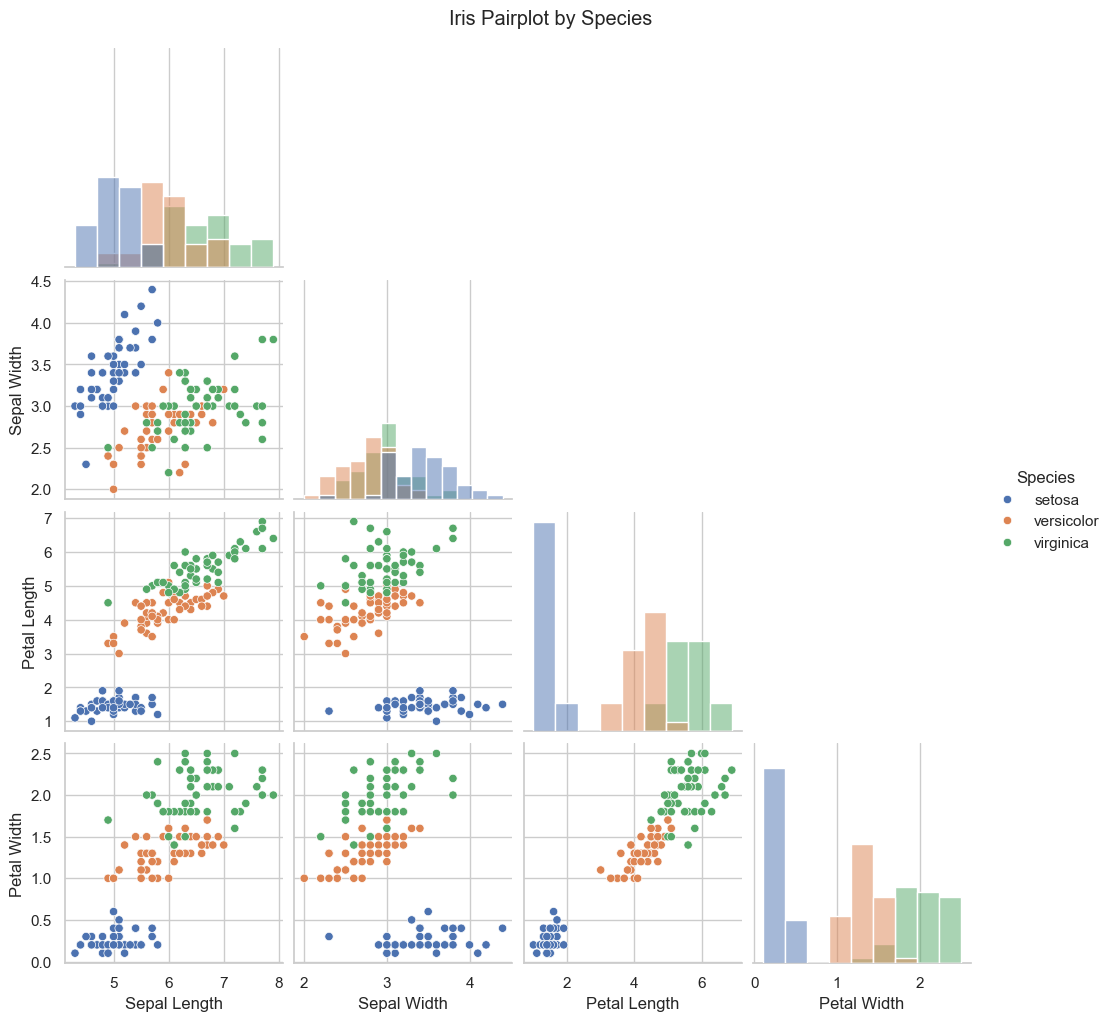

In [5]:
sns.set(context="notebook", style="whitegrid")
pp = sns.pairplot(
    data=pd.concat([X, df["species"]], axis=1).rename(columns={
        "sepal_length":"Sepal Length",
        "sepal_width":"Sepal Width",
        "petal_length":"Petal Length",
        "petal_width":"Petal Width",
        "species":"Species"
    }),
    hue="Species",
    diag_kind="hist",
    corner=True
)
pp.fig.suptitle("Iris Pairplot by Species", y=1.02)
pp.savefig("figures/iris_pairplot.png", dpi=150, bbox_inches="tight")
plt.show()


### *Pairplot Visualization Results*

The pairplot generated in this cell displays scatterplots and histograms for each pair of features in the Iris dataset, with points colored by species. This visualization reveals clear separation between species, especially for petal length and petal width, indicating these features are highly discriminative. The plot helps to visually assess class separability and feature relationships, supporting the suitability of the dataset for classification tasks.

### *Feature Correlation Heatmap*

This cell calculates the correlation matrix for the features and visualizes it as a heatmap. Annotated values show the strength and direction of relationships between features. The plot is saved for reference.

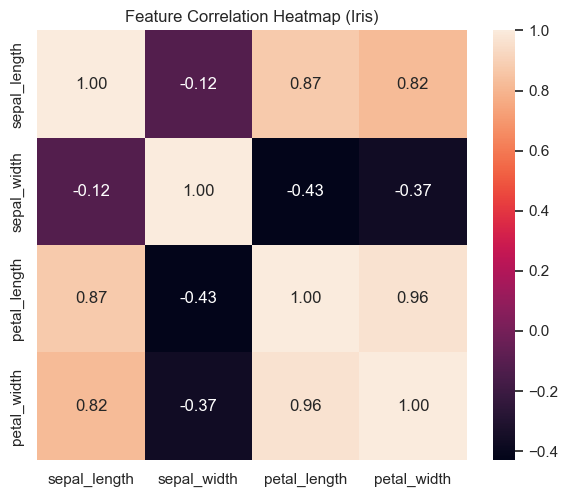

In [ ]:
corr = df[feature_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)# plotting the correlation heatmap
plt.title("Feature Correlation Heatmap (Iris)")# setting title for heatmap
plt.tight_layout()# setting layout
plt.savefig("figures/iris_correlation_heatmap.png", dpi=150)# Saving image
plt.show()# displaying the correlation heatmap

### *Feature Correlation Heatmap Results*

The heatmap shows the correlation coefficients between all pairs of features. Strong positive correlations are observed between petal length and petal width, while sepal width and petal width are weakly correlated. Understanding these relationships helps in feature selection and model interpretation, as highly correlated features may provide redundant information.

### *Boxplot Visualization*

This cell generates boxplots for each feature to visualize their distributions and identify potential outliers. The plot is saved to the `figures` folder for documentation.

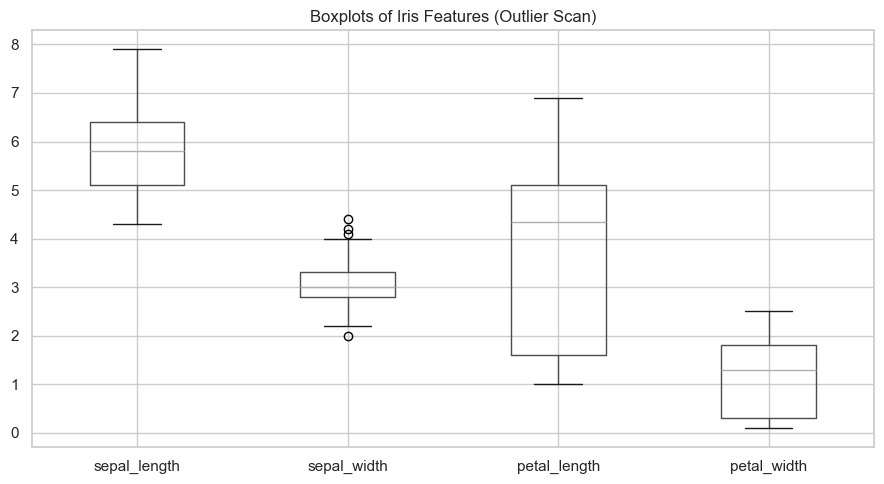

In [ ]:
plt.figure(figsize=(9,5)) # Boxplots of features
df[feature_cols].boxplot() # plotting boxplots
plt.title("Boxplots of Iris Features (Outlier Scan)")# setting title for boxplots
plt.tight_layout()# setting layout
plt.savefig("figures/iris_boxplots.png", dpi=150) # Saving image
plt.show()# displaying boxplots


### *Boxplot Visualization Results*

The boxplots illustrate the distribution and spread of each feature, highlighting the presence of outliers and differences in range. Most features show compact distributions with few outliers, suggesting the data is well-behaved and suitable for modeling. This visualization aids in detecting anomalies and understanding feature variability.

### *Train/Test Splitting Function*

This cell defines a reusable function to split the scaled features and encoded labels into training and test sets, using stratification to preserve class balance. It demonstrates usage and prints the shapes of the resulting splits, which are used in later modeling tasks.

In [ ]:
def train_test_split_iris(
    X_scaled: pd.DataFrame,# Scaled features
    y_encoded: pd.Series,# Scaled features and encoded labels
    test_size: float = 0.2,# Default test size of 20%
    random_state: int = 42,# Default random state for reproducibility
    stratify: bool = True # Default to stratified split to maintain class balance
): 
    """
    Splits scaled features and encoded labels into train/test.
    Uses stratification by default to preserve class balance.
    """
    strat = y_encoded if stratify else None
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=test_size, random_state=random_state, stratify=strat
    )
    return X_train, X_test, y_train, y_test 


X_train, X_test, y_train, y_test = train_test_split_iris(X_scaled, y_encoded) # splitting the dataset into training and testing sets
print("Train shapes:", X_train.shape, y_train.shape, "| Test shapes:", X_test.shape, y_test.shape) # displaying train/test shapes


Train shapes: (120, 4) (120,) | Test shapes: (30, 4) (30,)
